Ritika Chand <br>



In [ ]:
#CNN on large data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path1='/content/drive/My Drive/Colab Notebooks/v_data/train'
path2='/content/drive/My Drive/Colab Notebooks/v_data/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation,Dropout,Flatten,Dense
from keras import backend as bck


In [ ]:
width,height =224,224
#each image should hv same size
train_data_dir=path1
validation_data_dir=path2


In [ ]:
train_samples=400  #400 training imgs
validation_samples=100  #100 testing images
no_epochs=2

In [ ]:
if bck.image_data_format()=='channels_first':   #header file format, use if downloading img fromnet
  input_sh=(3,width,height)

else:
  input_sh=(width,height,3)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Activation,Dropout,Flatten,Dense

In [ ]:
model=Sequential()
#1st layer
model.add(Conv2D(32,(2,2),input_shape=input_sh)) #32 filters
#2nd layer activation
model.add(Activation('relu'))
#3rd
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(2,2))) #64ilters
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #drops out layers randomly
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)  # corrupting images for generalizing network. Randomly
#shear horizontal shrinking image and vertical increasing. Disproportionating it 
#zoom_range =size increasing by 20 percent

test_data=ImageDataGenerator(rescale=1./255)

In [ ]:
train_set=train_data.flow_from_directory(train_data_dir,target_size=(width,height),batch_size=16,class_mode='binary') 
# while training/testing image is reshaped to values we defined before
validation_set=test_data.flow_from_directory(validation_data_dir,target_size=(width,height),batch_size=16,class_mode='binary') 


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
model.fit_generator(train_set,steps_per_epoch=train_samples//16,epochs=no_epochs,validation_data=validation_set,validation_steps=validation_samples//16)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
25/25 [==============================] - 130s 5s/step - loss: 11.5538 - accuracy: 0.5202 - val_loss: 0.4504 - val_accuracy: 0.7188
Epoch 2/2
25/25 [==============================] - 24s 939ms/step - loss: 0.5390 - accuracy: 0.7622 - val_loss: 0.4064 - val_accuracy: 0.7812


In [ ]:
model.save('adv_cnn_IBM.h5')

In [ ]:
from keras.models import load_model
model=load_model('adv_cnn_IBM.h5')

In [ ]:
predict=model.predict_classes(validation_set)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
validation_set[6][0].shape  # 1st bracket = batch no.

(4, 224, 224, 3)

In [ ]:
validation_set[0][0].shape

(16, 224, 224, 3)

In [ ]:
predict1=model.predict_classes(validation_set[6][0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predict1 #we don't know what is 0 and what is 1

array([[0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
train_set.class_indices

{'cars': 0, 'planes': 1}

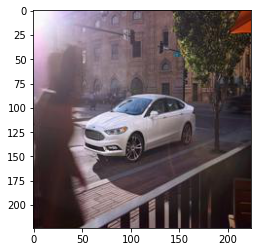

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(validation_set[6][0][0]) #checks 0th image of 6th batch

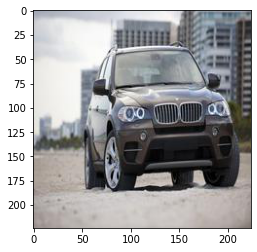

In [ ]:
plt.imshow(validation_set[6][0][1])

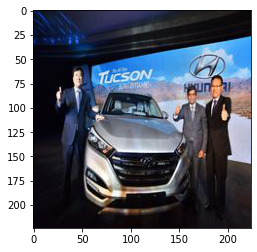

In [ ]:
plt.imshow(validation_set[6][0][2])

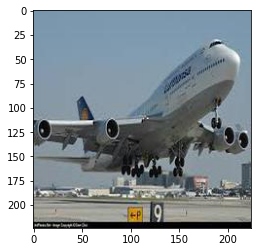

In [ ]:
plt.imshow(validation_set[6][0][3])

# Conclusion



CNN model is designed for large dataset with 400 training images and 100 test images. <br>
With 2 blocks of convulusional layer and 2 blocks of dense layer, the model is giving 78 percent test accuracy. This accuracy can be improved by increasing the no. of epochs.<br>
For the large batch of test dataset, the prediction shows all 4 images of car.
3 of the predicted images are correctly classified.